## Data Loading and Exploration
Loading the dataset and checking its structure.

In [4]:
#Importing frameworks to work with and loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  

In [5]:
# Check data types and missing values
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                

In [6]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.00000

## Visualizing Relationships
Plotting Height vs. Weight to check for linearity.

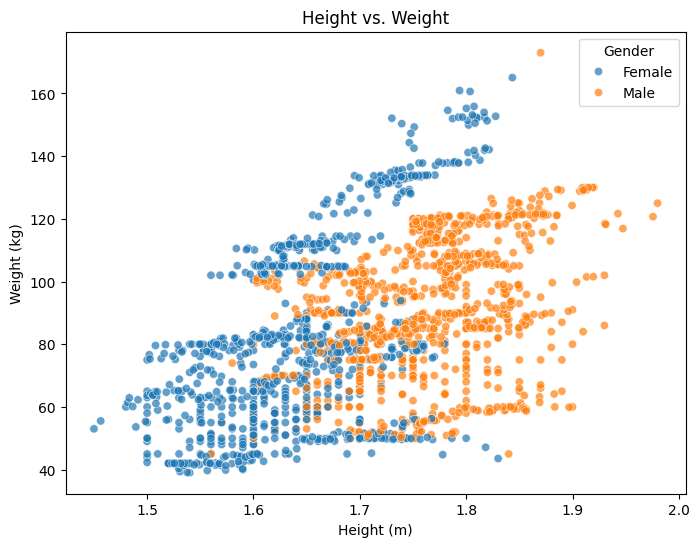

In [7]:
# Scatter plot of Height vs. Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Weight', data=df, hue='Gender', alpha=0.7)
plt.title('Height vs. Weight')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()

# Analysis of the Scatter Plot

The scatter plot visualizes the relationship between **height** (in meters, x-axis, 1.5 to 2.0 m) and **weight** (in kilograms, y-axis, 40 to 160 kg), with data points color-coded by gender: **blue** for females and **orange** for males. Here’s what stands out:

## Key Observations

- **Positive Trend**: As height increases, weight generally increases. This suggests that height is a reasonable predictor of weight.
- **Gender Differences**:
  - **Females**: Predominate at shorter heights (1.5–1.6 m) with weights mostly between 40–80 kg, though some reach 100 kg. At 1.6–1.7 m, weights extend to 120 kg.
  - **Males**: More common at taller heights (1.7–2.0 m), with weights ranging from 80–160 kg. Males tend to weigh more than females at similar heights (e.g., at 1.7 m, females are around 60–80 kg, while males are 80–100 kg).
- **Data Density**: The densest cluster is between 1.7–1.8 m and 80–100 kg, where both genders overlap significantly, indicating a common range in this dataset.
- **Outliers**:
  - A few females with weights above 140 kg at 1.6–1.7 m.
  - A few males with weights below 60 kg at 1.7–1.8 m. These outliers could influence the regression model.
- **Variability**: While the trend is upward, there’s considerable scatter, especially in the 1.6–1.8 m range, suggesting that height alone may not fully explain weight variations.

## Conclusion

The relationship appears roughly linear, but the spread and gender differences hint that a simple model might miss some nuances.

## Simple Linear Regression: Height vs. Weight
Using height to predict weight with a simple linear regression model.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select feature and target
X = df[['Height']]  # Feature: Height
y = df['Weight']    # Target: Weight

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error (MSE): 553.02
R-squared: 0.22
